# Tutorial 1: Load and Explore a Dataset
In this tutorial, we will be looking at the dataset from the book: [Why Civil Reistance Works](https://www.ericachenoweth.com/research/wcrw)

We will start by loading necessary python libraries and the data, which can be found in the linke above. 

## 1. Load libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'
import econtools.metrics as mt

## 2. Load data

In [4]:
data = pd.read_stata('data-replication-files/WCRWreplication.dta')
data.head() # Check data loads properly

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,...,1.694107,0.2134,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0
1,0.0,3,5000.0,1920,1918,Haiti,Caco Revolt,U.S. occupation,41.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,...,2.797281,0.0950,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0
3,0.0,3,650.0,1924,1916,Dominican Republic,Dominican insurgency,U.S. occupation,42.0,2.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,0.0,NaN
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,2.856470,0.3868,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0


In [5]:
# Print the name of the columns
print(data.columns)

Index(['defect', 'outcome', 'peakmembership', 'eyear', 'byear', 'location',
       'campaign', 'target', 'lccode', 'tccode', 'nonviol', 'viol', 'fselfdet',
       'regchange', 'secession', 'other', 'success', 'limited', 'failure',
       'ongoing', 'middleeast', 'americas', 'asia', 'fsu', 'europe', 'africa',
       'lpolity', 'tpolity', 'lgovcap', 'tgovcap', 'regviol', 'violsim',
       'extfor', 'statesup', 'regaid', 'sdirect', 'deltatpolity', 'deltatgdp',
       'lduration', 'lmembers', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8',
       't9', 't10', 't11', 'cw', 'postcw', 'ixnNVmem', 'rgdppc',
       'growthrgdppc', 'lupop', 'recur5', 'recur10', 'polityt10', 'polityt1',
       'polityt5', 'politychanget10', 'politychanget1', 'politychanget5',
       'politychanget0', 'authdum', 'deltatgovcap', 'memdum', 'lnpop',
       'ixnNVpc', 'lpolity1', 'lcinc1', 'lgdppc', 'wars', 'lmtnest', 'ef',
       'loclpolity1', 'loclcap1', 'loclcap2', 'loclcap3', 'loclcap4', 'mempc',
       'demdum',

In [6]:
# Load descriptions for each vriable (column)
var_descriptors = pd.read_csv('data-replication-files/WCRW_variables_descriptions.csv')
var_descriptors.head()

,Variable_Name,Source,Variable_Description
0,CAMPAIGN,Various encyclopedic entries; scholarly works;...,Name of campaign.
1,LOCATION,Various encyclopedic entries; scholarly works;...,Geographic base of campaign (country).
2,LCCODE,Correlates of War,Location country code.
3,BYEAR,Various encyclopedic entries; scholarly works;...,Year in which campaign begins.
4,EYEAR,Various encyclopedic entries; scholarly works;...,Year at which the campaign reaches its peak; i...


In [7]:
# Create dictionary of variable descriptions
dct_descriptors = {}
for i in range(var_descriptors.shape[0]):
    var_name = var_descriptors.Variable_Name[i].lower().strip()
    var_dscp = var_descriptors.Variable_Description[i]
    if var_name == 'ixnnvmem':
        var_name = 'ixnNVmem'
    elif var_name == 'ixnnvpc':
        var_name = 'ixnNVpc'
    dct_descriptors[var_name] = var_dscp
    

## 3. Explore data
In this section, we will start exploring the data so we have an idea of what we are working with. 

In [8]:
# Check the dimensions of the dataset
print('There are {} campaigns in the dataset.'.format(data.shape[0]))

There are 323 campaigns in the dataset.


In [9]:
# Explore outcomes
print('Outcomes are an {}'.format(dct_descriptors['outcome']))

data['limited'].value_counts()

Outcomes are an Ordinal measure with result code. Success=5; Limited Success=4; Failure=3. 


0    270
1     53
Name: limited, dtype: int64

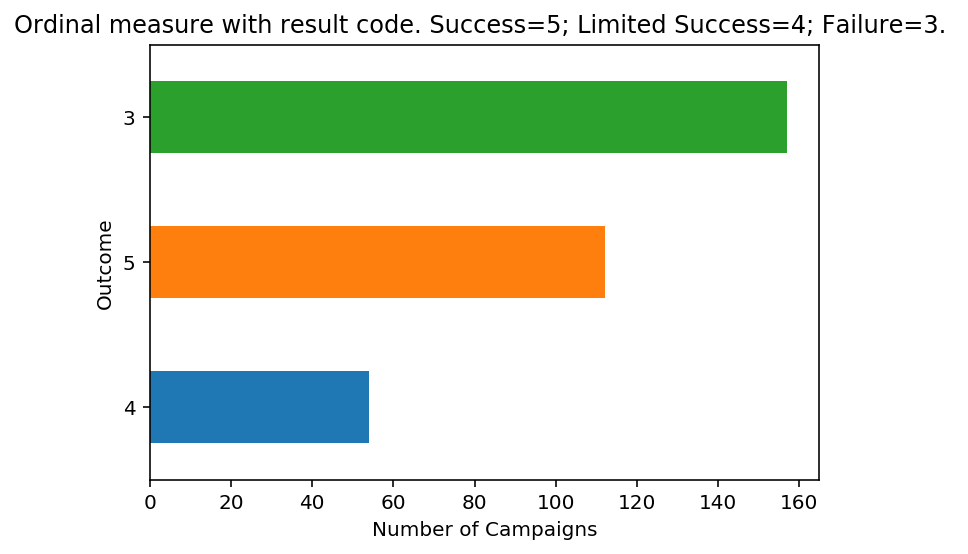

In [10]:
# Make bar plots of outcomes
campaign_outcomes = data['outcome'].value_counts()
campaign_outcomes.sort_values().plot(kind='barh')
plt.xlabel('Number of Campaigns')
plt.ylabel('Outcome')
plt.title('{}'.format(dct_descriptors['outcome']))
plt.show()

In [11]:
# Explore defect
print('Defect is {}'.format(dct_descriptors['defect']))

Defect is Dichotomous variables identifying whether the target’s security forces defected during the conflict. Does not include routine individual defections, but rather large-scale, systematic breakdowns on the execution of orders from the target regime. 


Text(0.5, 0, 'Defect')

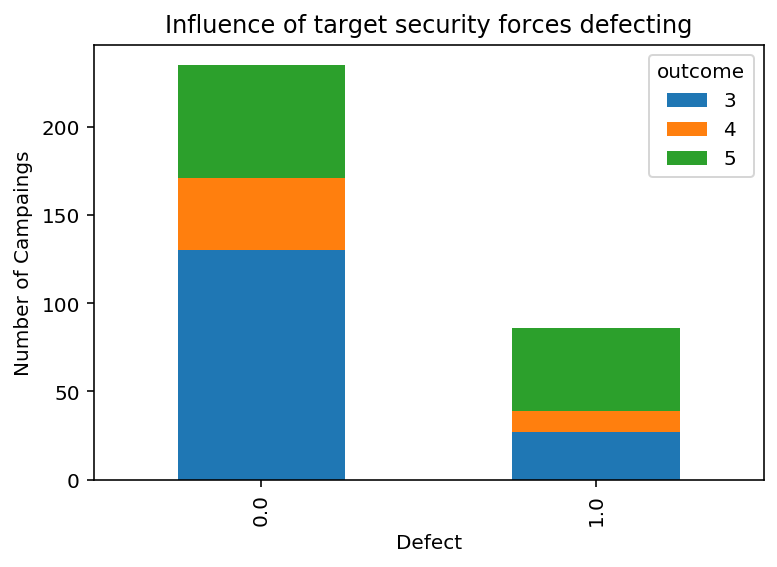

In [12]:
data.groupby(['defect','outcome']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Influence of target security forces defecting')
plt.ylabel('Number of Campaings')
plt.xlabel('Defect')

In [13]:
# Explore defect
print('politychanget10 is {}'.format(dct_descriptors['politychanget10']))

politychanget10 is Change in location POLITY IV score ten years after campaign ends. 


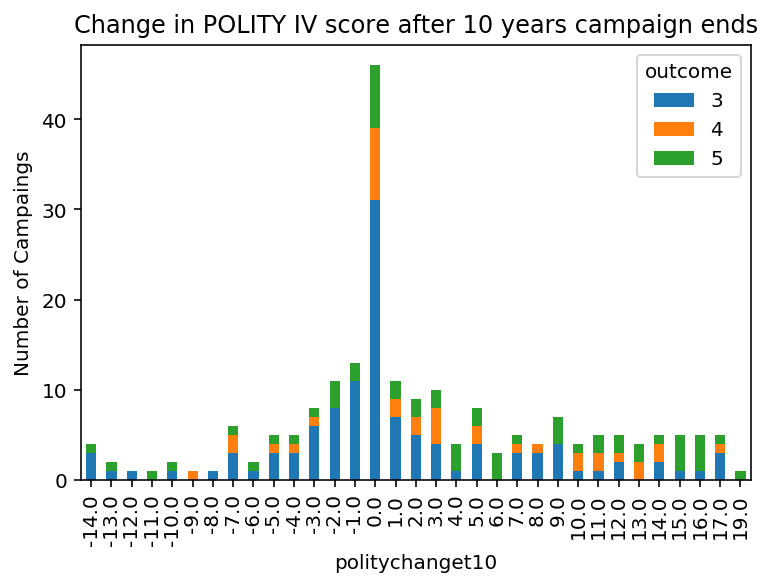

In [14]:
data.groupby(['politychanget10','outcome']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Change in POLITY IV score after 10 years campaign ends')
plt.ylabel('Number of Campaings')
plt.xlabel('politychanget10')
plt.show()

In [15]:
# Explore defect
print('regviol is {}'.format(dct_descriptors['regviol']))

regviol is Dichotomous variable identifying whether the regime used violence to crack down on campaign.


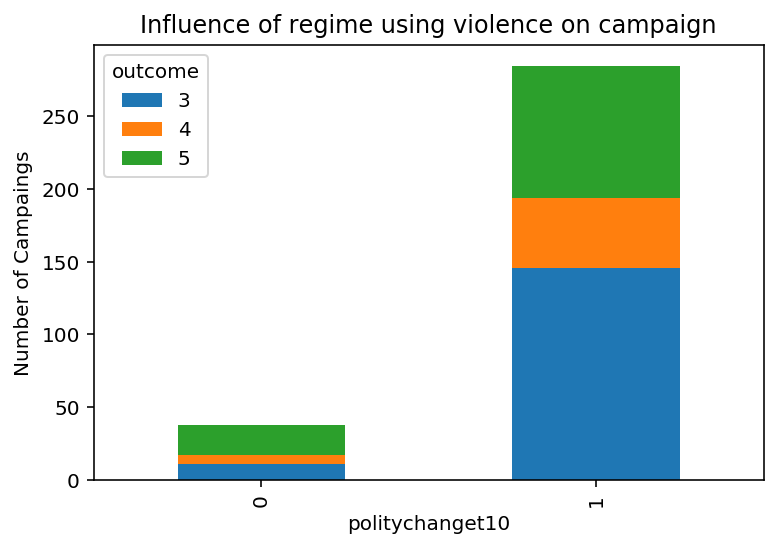

In [16]:
data.groupby(['regviol','outcome']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Influence of regime using violence on campaign')
plt.ylabel('Number of Campaings')
plt.xlabel('politychanget10')
plt.show()

In [17]:
# Explore defect
var_name = 'nonviol'
print('{} is {}'.format(var_name, dct_descriptors['regviol']))

nonviol is Dichotomous variable identifying whether the regime used violence to crack down on campaign.


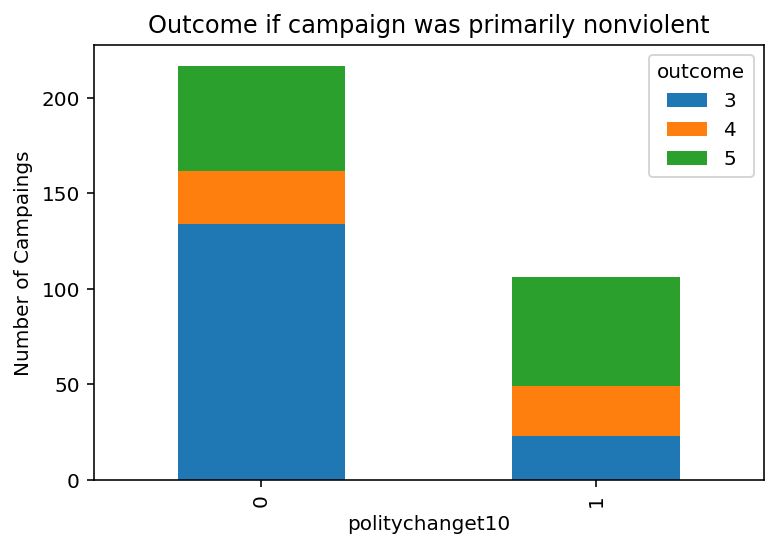

In [18]:
data.groupby([var_name,'outcome']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Outcome if campaign was primarily nonviolent')
plt.ylabel('Number of Campaings')
plt.xlabel('politychanget10')
plt.show()

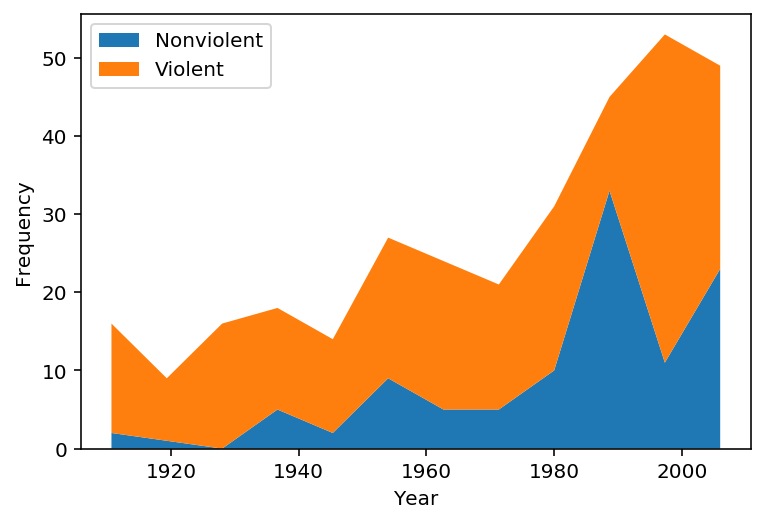

In [161]:
# Figure 1.1 
y_n, x = np.histogram(data[data.nonviol==1.0]['eyear'], bins = 12)
y, x = np.histogram(data[data.nonviol==0.0]['eyear'], bins = 12)

x = x[:-1] + np.diff(x)

fig, ax = plt.subplots()
ax.stackplot(x, y_n, y)
plt.legend(['Nonviolent','Violent'], loc=2)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [177]:
sub_data = data[(data.eyear >= 1940) & (data.eyear <= 1949)]

In [192]:
denominator = sub_data[(sub_data.nonviol == 1.0)].shape[0]
numerator = sub_data[(sub_data.nonviol == 1.0) & (sub_data.outcome == 5)].shape[0]

numerator/denominator*100

40.0

In [198]:
years = [1940, 1950, 1960, 1970, 1980, 1990, 2000]

for year in years:
    sub_data = data[(data.eyear >= year) & (data.eyear <= year + 9)]
    num_nonviol_camp = sub_data[(sub_data.nonviol == 0.0)].shape[0]
    num_nonviol_sucs = sub_data[(sub_data.nonviol == 0.0) & (sub_data.outcome == 5)].shape[0]
    per_nonviol_sucs = num_nonviol_sucs / num_nonviol_camp * 100
    print("Number of nonviolent campaings between {}-{}: {}".format(year, year+9, num_nonviol_camp))
    print("Number of successful nonviolent campaings between {}-{}: {}".format(year, year+9, num_nonviol_sucs))
    print("Percent of successful nonviolent campaings between {}-{}: {}%".format(year, year+9, per_nonviol_sucs))

Number of nonviolent campaings between 1940-1949: 21
Number of successful nonviolent campaings between 1940-1949: 7
Percent of successful nonviolent campaings between 1940-1949: 33.33333333333333%
Number of nonviolent campaings between 1950-1959: 19
Number of successful nonviolent campaings between 1950-1959: 7
Percent of successful nonviolent campaings between 1950-1959: 36.84210526315789%
Number of nonviolent campaings between 1960-1969: 17
Number of successful nonviolent campaings between 1960-1969: 4
Percent of successful nonviolent campaings between 1960-1969: 23.52941176470588%
Number of nonviolent campaings between 1970-1979: 26
Number of successful nonviolent campaings between 1970-1979: 10
Percent of successful nonviolent campaings between 1970-1979: 38.46153846153847%
Number of nonviolent campaings between 1980-1989: 13
Number of successful nonviolent campaings between 1980-1989: 5
Percent of successful nonviolent campaings between 1980-1989: 38.46153846153847%
Number of nonv

In [201]:
sub_data[(sub_data.nonviol == 0.0)].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [217]:
sub_data['outcome'].value_counts(normalize=True).values.tolist()

[0.4523809523809524, 0.40476190476190477, 0.14285714285714285]

In [253]:
sub_data = data[data.nonviol == 1.0]
sub_df = sub_data['outcome'].value_counts(normalize=True)
nonviol_x = sub_df.index.tolist()
nonviol_bar = sub_df.values.tolist()
sub_data = data[data.nonviol == 0.0]
sub_df = sub_data['outcome'].value_counts(normalize=True)
viol_x = sub_df.index.tolist()
viol_bar = sub_df.values.tolist()

In [255]:
viol_x

[3, 5, 4]

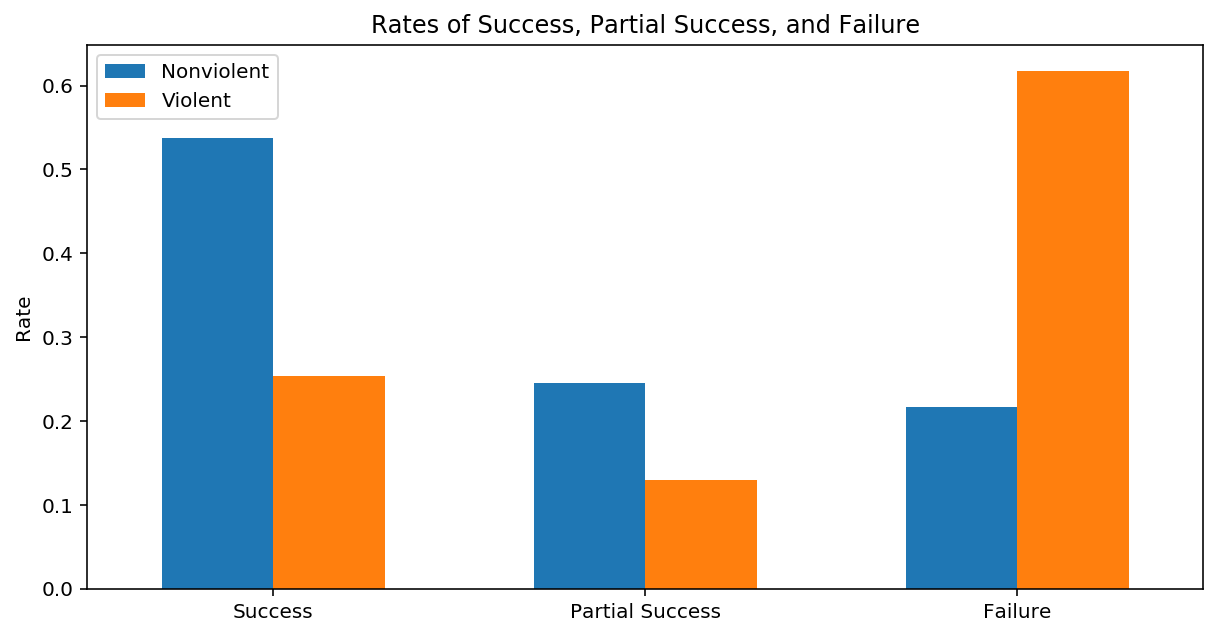

In [262]:
# Figure 1.4 
# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = nonviol_bar
# Specify the values of orange bars (height)
orange_bar = viol_bar

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

x = np.array(x)
# Plotting
plt.bar(np.array(nonviol_x)+0.3/2, blue_bar , width, label='Nonviolent')
plt.bar(np.array(viol_x)-0.3/2, orange_bar, width, label='Violent')
plt.ylabel('Rate')
plt.title('Rates of Success, Partial Success, and Failure')
plt.xlim(5.5, 2.5)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(x, ('Success', 'Partial Success', 'Failure'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [286]:
sub_data = data[(data.nonviol==1.0) & (data.regchange==1.0)]
sub_df = sub_data['outcome'].value_counts(normalize=True)
sub_df

5    0.592593
4    0.234568
3    0.172840
Name: outcome, dtype: float64

In [287]:
sub_data = data[(data.nonviol==0.0) & (data.regchange==1.0)]
sub_df = sub_data['outcome'].value_counts(normalize=True)
sub_df

3    0.612613
5    0.270270
4    0.117117
Name: outcome, dtype: float64

In [284]:
sub_data = data[(data.nonviol==1.0)]
sub_data = sub_data[(sub_data.secession==1.0) | (sub_data.fselfdet==1.0)]
sub_df = sub_data['outcome'].value_counts(normalize=True)
sub_df

3    0.380952
4    0.333333
5    0.285714
Name: outcome, dtype: float64

In [285]:
sub_data = data[(data.nonviol==0.0)]
sub_data = sub_data[(sub_data.secession==1.0) | (sub_data.fselfdet==1.0)]
sub_df = sub_data['outcome'].value_counts(normalize=True)
sub_df

3    0.595960
5    0.252525
4    0.151515
Name: outcome, dtype: float64

In [281]:
sub_data = data[(data.nonviol==1.0) & (data.other==1.0)]
sub_df = sub_data['outcome'].value_counts(normalize=True)
sub_df

5    0.75
3    0.25
Name: outcome, dtype: float64

In [282]:
sub_data = data[(data.nonviol==0.0) & (data.other==1.0)]
sub_df = sub_data['outcome'].value_counts(normalize=True)
sub_df

3    1.0
Name: outcome, dtype: float64

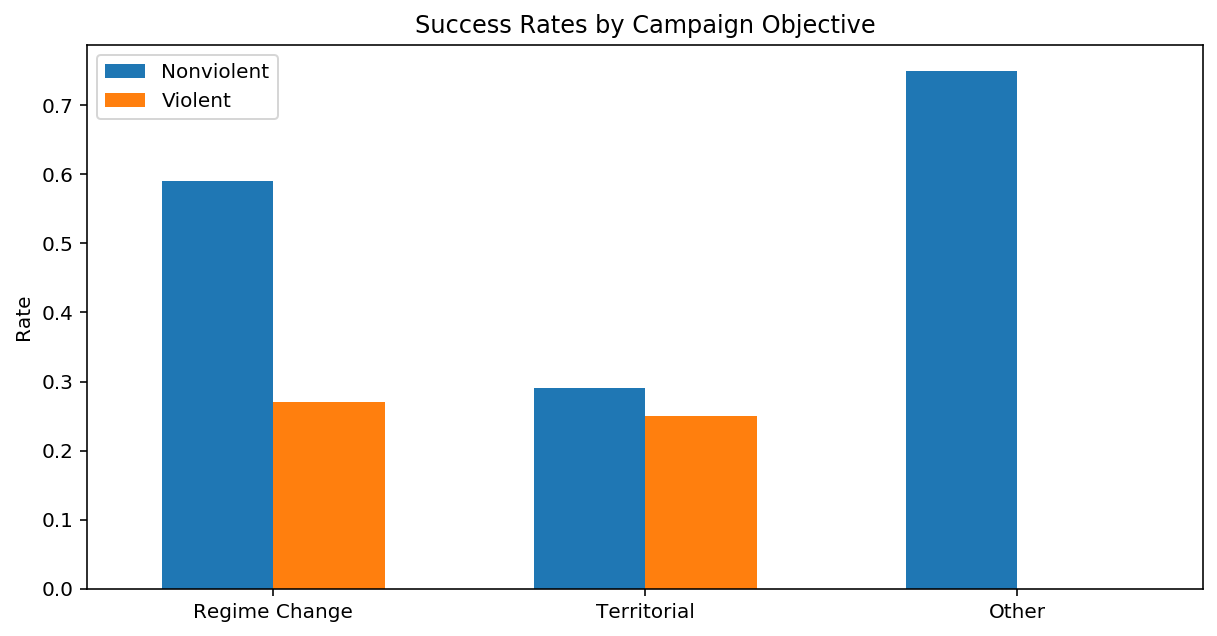

In [296]:
# Figure 1.4 
# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = [0.59, 0.29, 0.75]
# Specify the values of orange bars (height)
orange_bar = [0.27, 0.25, 0.0]

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

x = np.array(x)
# Plotting
plt.bar(np.array(nonviol_x)+0.3/2, blue_bar , width, label='Nonviolent')
plt.bar(np.array(nonviol_x)-0.3/2, orange_bar, width, label='Violent')
plt.ylabel('Rate')
plt.title('Success Rates by Campaign Objective')
plt.xlim(5.5, 2.5)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(x, ('Regime Change', 'Territorial', 'Other'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()